In [23]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
warnings.filterwarnings('ignore')

In [24]:
df = pd.read_csv('car.csv')
df

,buying,maint,doors,persons,lug_boot,safety,Unnamed: 6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [25]:
df.rename(columns={'Unnamed: 6':'status'},inplace = True)
df

,buying,maint,doors,persons,lug_boot,safety,status
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [26]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,status
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [27]:
for i in df:
    print(df[i].unique())

['vhigh' 'high' 'med' 'low']
['vhigh' 'high' 'med' 'low']
['2' '3' '4' '5more']
['2' '4' 'more']
['small' 'med' 'big']
['low' 'med' 'high']
['unacc' 'acc' 'vgood' 'good']


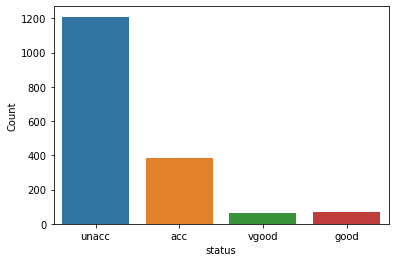

unacc    1210
acc       384
good       69
vgood      65
Name: status, dtype: int64

In [28]:
sns.countplot('status',data=df)
plt.ylabel('Count')
plt.show()
df['status'].value_counts()

In [29]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for i in df:
    df[i] = encoder.fit_transform(df[i])

In [30]:
#Finding The features
X = df.drop('status',axis=1)
y = df['status']

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.32, random_state = 42)

# KNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [33]:
knn_pred = model.predict(X_test)

In [34]:
print('Training set score: {:.4f}'.format(model.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(model.score(X_test, y_test)))

Training set score: 0.9370
Test set score: 0.8499


In [45]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.72      0.65      0.68       125
           1       0.38      0.26      0.31        19
           2       0.89      0.96      0.93       384
           3       1.00      0.56      0.72        25

    accuracy                           0.85       553
   macro avg       0.75      0.61      0.66       553
weighted avg       0.84      0.85      0.84       553



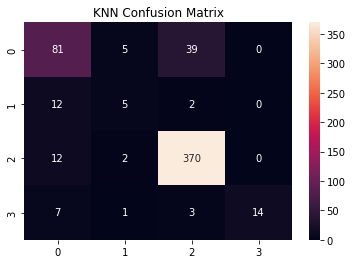

In [38]:
plt.title('KNN Confusion Matrix')
sns.heatmap(confusion_matrix(y_test,knn_pred),annot=True,fmt='g')
plt.show()